## REDUCCION DE DIMENSIONALIDAD
La reducción de dimensionalidad es una técnica que consiste en disminuir el número de variables (columnas o características) en un conjunto de datos, manteniendo la mayor cantidad posible de información relevante. Se utiliza para simplificar los datos, mejorar la visualización, reducir el ruido y acelerar los algoritmos de machine learning.

Métodos comunes:

PCA (Análisis de Componentes Principales): transforma las variables originales en un nuevo conjunto de variables (componentes principales) que explican la mayor varianza posible.
t-SNE: técnica no lineal para visualizar datos de alta dimensión en 2D o 3D.
Selección de características: elegir solo las variables más importantes según algún criterio.
La reducción de dimensionalidad ayuda a evitar el sobreajuste, mejora la eficiencia y facilita la interpretación de los datos.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# La instrucción np.random.seed(42) se utiliza para fijar la semilla del generador de números aleatorios de NumPy.
# Esto significa que, cada vez que ejecutes el código, los números aleatorios generados serán los mismos.
# Sirve para que los resultados sean reproducibles y puedas obtener siempre los mismos datos aleatorios al compartir o volver a ejecutar tu código.

np.random.seed(42)
data = {
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10),
    'feature4': np.random.rand(10),
    'feature5': np.random.rand(10)
    
    
}

df = pd.DataFrame(data)
print("DataFrame original:")
display(df)



DataFrame original:


,feature1,feature2,feature3,feature4,feature5
0,0.374540,0.020584,0.611853,0.607545,0.122038
1,0.950714,0.969910,0.139494,0.170524,0.495177
2,0.731994,0.832443,0.292145,0.065052,0.034389
3,0.598658,0.212339,0.366362,0.948886,0.909320
4,0.156019,0.181825,0.456070,0.965632,0.258780
5,0.155995,0.183405,0.785176,0.808397,0.662522
6,0.058084,0.304242,0.199674,0.304614,0.311711
7,0.866176,0.524756,0.514234,0.097672,0.520068
8,0.601115,0.431945,0.592415,0.684233,0.546710
9,0.708073,0.291229,0.046450,0.440152,0.184854


In [4]:
# PSA (Análisis de Componentes Principales)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
print("\nDataFrame después de PCA:")
display(df_pca)


DataFrame después de PCA:


,PC1,PC2
0,1.248333,-1.192094
1,-2.704439,1.014203
2,-2.371229,-0.804675
3,1.284276,1.741340
4,1.695832,-0.938603
5,2.377583,0.610852
6,0.100715,-1.339486
7,-1.146386,0.926520
8,0.567221,0.867118
9,-1.051906,-0.885175


In [6]:
print("\nVarianza explicada por cada componente:")
print(pca.explained_variance_ratio_)



Varianza explicada por cada componente:
[0.54851505 0.23143335]


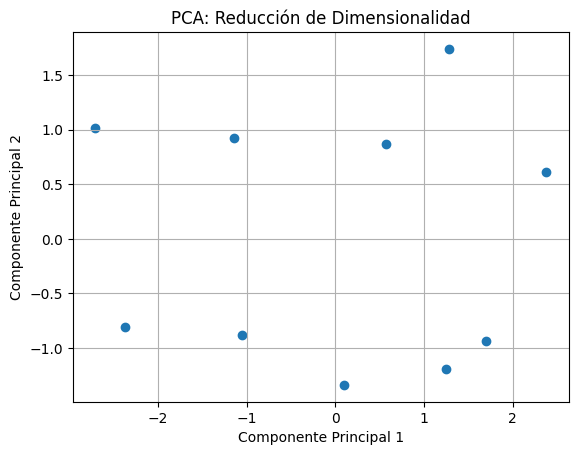

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: Reducción de Dimensionalidad')
plt.grid()
plt.show()

In [8]:
#Tecnica de seleccion de caracteristicas
# Eliminacion de caracteristicas con baja varianza
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
df_reduced = selector.fit_transform(df)
df_reduced = pd.DataFrame(df_reduced, columns=df.columns[selector.get_support()])
print("\nDataFrame después de eliminar características con baja varianza:")
display(df_reduced)


DataFrame después de eliminar características con baja varianza:


,feature4
0,0.607545
1,0.170524
2,0.065052
3,0.948886
4,0.965632
5,0.808397
6,0.304614
7,0.097672
8,0.684233
9,0.440152


In [9]:
display(df.corr())

,feature1,feature2,feature3,feature4,feature5
feature1,1.000000,0.704285,-0.372964,-0.555227,0.069729
feature2,0.704285,1.000000,-0.450620,-0.736808,-0.092807
feature3,-0.372964,-0.450620,1.000000,0.464012,0.294302
feature4,-0.555227,-0.736808,0.464012,1.000000,0.419207
feature5,0.069729,-0.092807,0.294302,0.419207,1.000000


In [10]:
umnbral_correlacion = 0.7
correlacion_abs = df.corr().abs()
columnas_a_eliminar = set()
for i in range(len(correlacion_abs.columns)):
    for j in range(i):
        if correlacion_abs.iloc[i, j] > umnbral_correlacion:
            colname = correlacion_abs.columns[i]
            columnas_a_eliminar.add(colname) # Elimina la columna con mayor índice

print("\nDataFrame después de eliminar características altamente correlacionadas:")
df_reduced_corr = df.drop(columns=columnas_a_eliminar)
display(df_reduced_corr)
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# ---


DataFrame después de eliminar características altamente correlacionadas:


,feature1,feature3,feature5
0,0.374540,0.611853,0.122038
1,0.950714,0.139494,0.495177
2,0.731994,0.292145,0.034389
3,0.598658,0.366362,0.909320
4,0.156019,0.456070,0.258780
5,0.155995,0.785176,0.662522
6,0.058084,0.199674,0.311711
7,0.866176,0.514234,0.520068
8,0.601115,0.592415,0.546710
9,0.708073,0.046450,0.184854
